In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [6]:
# Load dataset
import io
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

Saving Iris.csv to Iris (3).csv


In [7]:
# Normalize features
X_scaled = StandardScaler().fit_transform(X)

In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Try different values of K
k_vals = range(1, 21)
acc = []
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    acc.append(accuracy_score(y_test, model.predict(X_test)))

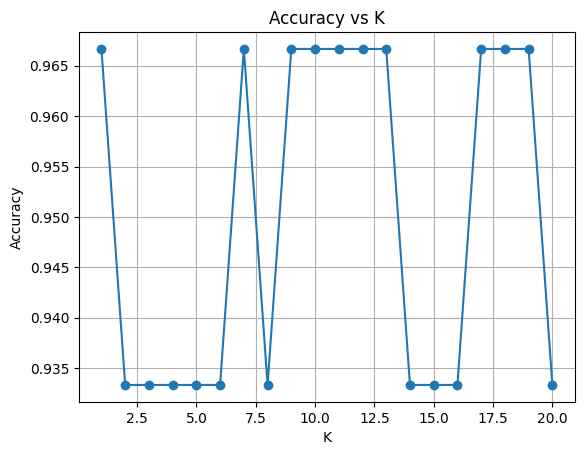

(None, None)

In [10]:
# Plot accuracy vs K
plt.plot(k_vals, acc, marker='o')
plt.xlabel("K"), plt.ylabel("Accuracy"), plt.title("Accuracy vs K")
plt.grid(True), plt.show()

In [11]:
# Best K and evaluation
best_k = k_vals[np.argmax(acc)]
knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train)
pred = knn.predict(X_test)
print(f"Best K: {best_k}, Accuracy: {accuracy_score(y_test, pred):.2f}")

Best K: 1, Accuracy: 0.97


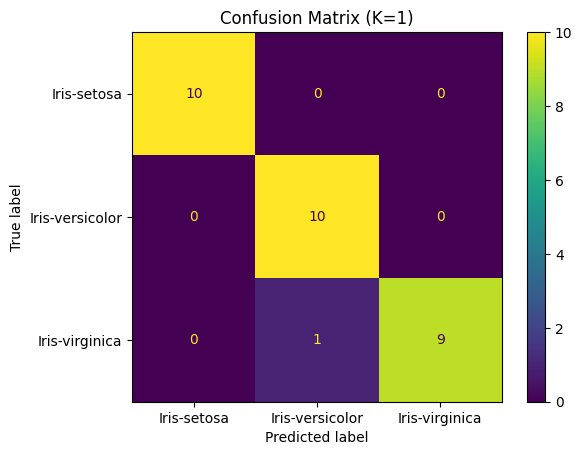

(Text(0.5, 1.0, 'Confusion Matrix (K=1)'), None)

In [12]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title(f"Confusion Matrix (K={best_k})"), plt.show()

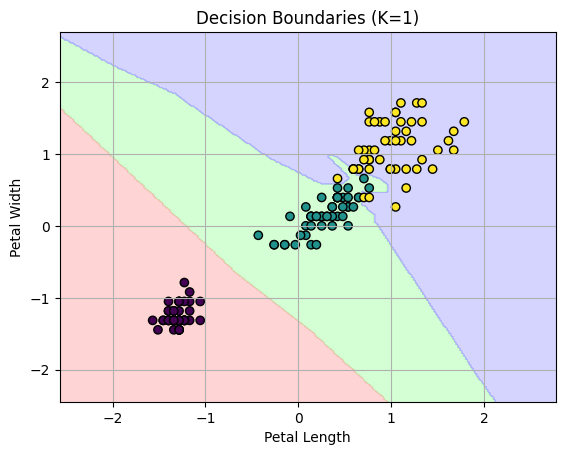

(None, None)

In [13]:
# Decision boundaries (only 2 features for 2D)
X_2d = df[['PetalLengthCm', 'PetalWidthCm']]
X_2d_scaled = StandardScaler().fit_transform(X_2d)
y_encoded = LabelEncoder().fit_transform(y)

knn_2d = KNeighborsClassifier(n_neighbors=1).fit(X_2d_scaled, y_encoded)

x_min, x_max = X_2d_scaled[:, 0].min()-1, X_2d_scaled[:, 0].max()+1
y_min, y_max = X_2d_scaled[:, 1].min()-1, X_2d_scaled[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.5)
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y_encoded, cmap='viridis', edgecolor='k')
plt.xlabel("Petal Length"), plt.ylabel("Petal Width"), plt.title("Decision Boundaries (K=1)")
plt.grid(True), plt.show()
